In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

In [2]:
#Import data
# https://docs.google.com/spreadsheets/d/15xcUjoaNIC-wZwWdLODl7ag87_gqr6B5/edit?usp=sharing&ouid=113748664607098062561&rtpof=true&sd=true
file_id = '15xcUjoaNIC-wZwWdLODl7ag87_gqr6B5'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'SOTE_Orders_Oct_25_2023.xlsx', quiet=False)
order_data_df = pd.read_excel(
    "SOTE_Orders_Oct_25_2023.xlsx",
)

Downloading...
From: https://drive.google.com/uc?id=15xcUjoaNIC-wZwWdLODl7ag87_gqr6B5
To: /content/SOTE_Orders_Oct_25_2023.xlsx
100%|██████████| 24.4M/24.4M [00:00<00:00, 31.6MB/s]


In [3]:
orders = order_data_df.copy()

In [4]:
print(orders.shape)
orders.head()

(233371, 18)


,Store No.,Order Creation Date,Document No.,Service Name,Service Date,Capacity Value Weight,Capacity Value Volume,No. of Items,No of Packages,Total Order Value,Ship-to Postcode,Ship-to City,Sell-to City,Service Name 2,Channel,Oversold Order,Unit,Unit name
0,634,2023-10-25,S634230080611,Da Clic y Recoge E-Commerce,2023-10-28,34.600,0.095444,1.0,2.0,5249.0,06700,Cuauhtémoc,Mexico,Order & Collect Stores,E-commerce,Complete,634,E-commerce
1,634,2023-10-25,S634230080612,Parcel Delivery,2023-10-28,1.834,0.007680,1.0,1.0,349.0,04450,Ciudad de Mexico,Ciudad de Mexico,Parcel,E-commerce,Complete,634,E-commerce
2,634,2023-10-25,S634230080613,Parcel Delivery,2023-10-28,13.237,0.061946,4.0,4.0,1946.0,44100,Guadalajara,Guadalajara,Parcel,E-commerce,Complete,634,E-commerce
3,634,2023-10-25,S634230080614,Parcel Delivery,2023-10-28,23.360,0.070175,3.0,3.0,2699.0,01760,CDMX,CDMX,Parcel,E-commerce,Complete,634,E-commerce
4,634,2023-10-25,S634230080615,Parcel Delivery,2023-10-28,1.308,0.027368,5.0,5.0,507.0,50110,Toluca,Toluca,Parcel,E-commerce,Complete,634,E-commerce


In [5]:
# Unique counts
print("Unique Stores:", orders['Store No.'].nunique())
print("Unique Postcodes:", orders['Ship-to Postcode'].nunique())
print("Unique Cities:", orders['Ship-to City'].nunique())

# Basic stats
orders.describe(include='all')


Unique Stores: 1
Unique Postcodes: 7063
Unique Cities: 7579


,Store No.,Order Creation Date,Document No.,Service Name,Service Date,Capacity Value Weight,Capacity Value Volume,No. of Items,No of Packages,Total Order Value,Ship-to Postcode,Ship-to City,Sell-to City,Service Name 2,Channel,Oversold Order,Unit,Unit name
count,233371.0,233371,233371,233371,233371,233371.000000,233371.000000,233371.000000,233371.000000,233371.000000,233371,233371,233354,233371,233371,233371,233371.000000,233371
unique,NaN,NaN,233350,14,NaN,NaN,NaN,NaN,NaN,NaN,7063,7579,8241,7,4,2,NaN,4
top,NaN,NaN,S634240089869,Parcel Delivery,NaN,NaN,NaN,NaN,NaN,NaN,15530,Venustiano Carranza,Venustiano Carranza,Parcel,E-commerce,Complete,NaN,E-commerce
freq,NaN,NaN,8,88515,NaN,NaN,NaN,NaN,NaN,NaN,34524,35435,24418,89108,158180,232976,NaN,174717
mean,634.0,2024-06-27 00:11:48.242240768,NaN,NaN,2024-07-03 10:48:24.083198208,42.230672,0.178328,10.825818,11.290842,6588.319419,NaN,NaN,NaN,NaN,NaN,NaN,631.604514,NaN
min,634.0,2023-10-25 00:00:00,NaN,NaN,2023-10-28 00:00:00,0.000000,0.000000,1.000000,1.000000,-13899.000000,NaN,NaN,NaN,NaN,NaN,NaN,612.000000,NaN
25%,634.0,2024-03-03 00:00:00,NaN,NaN,2024-03-09 00:00:00,5.511000,0.025578,1.000000,2.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,634.000000,NaN
50%,634.0,2024-07-07 00:00:00,NaN,NaN,2024-07-13 00:00:00,19.624000,0.076556,3.000000,4.000000,3201.000000,NaN,NaN,NaN,NaN,NaN,NaN,634.000000,NaN
75%,634.0,2024-10-23 00:00:00,NaN,NaN,2024-10-31 00:00:00,52.145000,0.188079,8.000000,9.000000,7600.000000,NaN,NaN,NaN,NaN,NaN,NaN,634.000000,NaN
max,634.0,2025-01-31 00:00:00,NaN,NaN,2025-01-31 00:00:00,3522.552000,22.947767,4100.000000,4100.000000,593869.000000,NaN,NaN,NaN,NaN,NaN,NaN,683.000000,NaN


In [6]:
zip_counts = orders['Ship-to Postcode'].value_counts().reset_index()
zip_counts.columns = ['Ship-to Postcode', 'Order_Count']
zip_counts.head(10)  # Top 10 zip codes by number of orders

,Ship-to Postcode,Order_Count
0,15530,34524
1,72820,14203
2,06700,4736
3,03100,2504
4,06100,1846
5,11560,1664
6,04100,1661
7,11000,1651
8,03020,1505
9,72197,1475


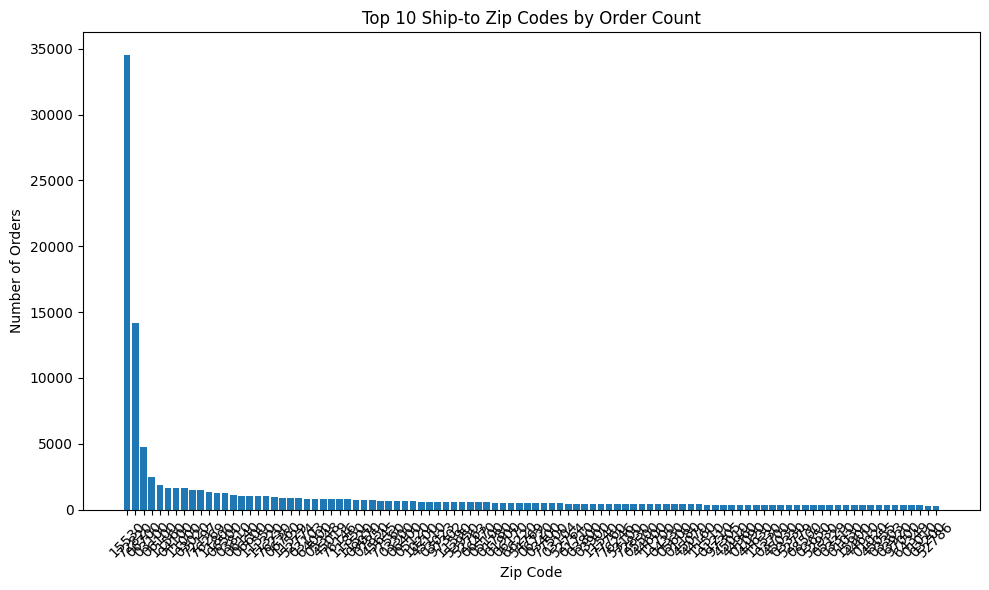

In [7]:
import matplotlib.pyplot as plt

top_zips = zip_counts.head(100)
plt.figure(figsize=(10,6))
plt.bar(top_zips['Ship-to Postcode'].astype(str), top_zips['Order_Count'])
plt.title('Top 10 Ship-to Zip Codes by Order Count')
plt.xlabel('Zip Code')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
orders['Order Creation Date'] = pd.to_datetime(orders['Order Creation Date'])


In [9]:
orders

,Store No.,Order Creation Date,Document No.,Service Name,Service Date,Capacity Value Weight,Capacity Value Volume,No. of Items,No of Packages,Total Order Value,Ship-to Postcode,Ship-to City,Sell-to City,Service Name 2,Channel,Oversold Order,Unit,Unit name
0,634,2023-10-25,S634230080611,Da Clic y Recoge E-Commerce,2023-10-28,34.600,0.095444,1.0,2.0,5249.0,06700,Cuauhtémoc,Mexico,Order & Collect Stores,E-commerce,Complete,634,E-commerce
1,634,2023-10-25,S634230080612,Parcel Delivery,2023-10-28,1.834,0.007680,1.0,1.0,349.0,04450,Ciudad de Mexico,Ciudad de Mexico,Parcel,E-commerce,Complete,634,E-commerce
2,634,2023-10-25,S634230080613,Parcel Delivery,2023-10-28,13.237,0.061946,4.0,4.0,1946.0,44100,Guadalajara,Guadalajara,Parcel,E-commerce,Complete,634,E-commerce
3,634,2023-10-25,S634230080614,Parcel Delivery,2023-10-28,23.360,0.070175,3.0,3.0,2699.0,01760,CDMX,CDMX,Parcel,E-commerce,Complete,634,E-commerce
4,634,2023-10-25,S634230080615,Parcel Delivery,2023-10-28,1.308,0.027368,5.0,5.0,507.0,50110,Toluca,Toluca,Parcel,E-commerce,Complete,634,E-commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233366,634,2025-01-31,R634230016017,Return Delivery,2025-01-31,64.680,0.178875,6.0,6.0,7200.0,14400,CDMX,CDMX,Return,Return Order,Complete,634,E-commerce
233367,634,2025-01-31,R634230016020,Return Delivery,2025-01-31,3.570,0.007362,5.0,5.0,465.0,15530,Venustiano Carranza,Venustiano Carranza,Return,Return Order,Complete,634,E-commerce
233368,634,2025-01-31,R634230016023,Return Delivery,2025-01-31,0.000,0.000000,100.0,100.0,100.0,06100,Ciudad de Mexico,Ciudad de Mexico,Return,Return Order,Complete,634,E-commerce
233369,634,2025-01-31,R634230016031,Return Delivery,2025-01-31,0.000,0.000000,250.0,250.0,250.0,15530,Venustiano Carranza,Venustiano Carranza,Return,Return Order,Complete,634,E-commerce


In [10]:
# Group by week starting Monday
orders['Order_Week'] = orders['Order Creation Date'].dt.to_period('W').apply(lambda r: r.start_time)

In [11]:
weekly_orders = orders.groupby('Order_Week').size().reset_index(name='Order_Count')

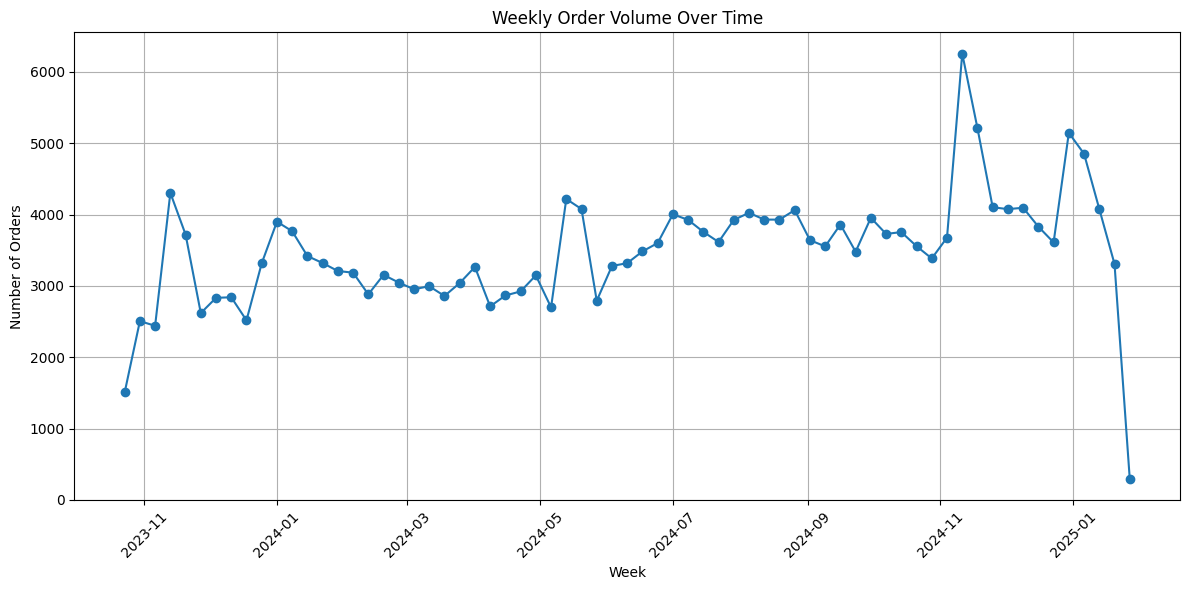

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(weekly_orders['Order_Week'], weekly_orders['Order_Count'], marker='o')
plt.title('Weekly Order Volume Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
order_data_df['Service Name 2'].value_counts(dropna=False)

,count
Service Name 2,
Parcel,89108
Home Delivery,79751
Order & Collect Stores,32426
Click & Collect TSP,19100
Return,12972
ASO,9
B2B,5


In [14]:
weekly_service = orders.groupby(['Order_Week', 'Service Name 2']).size().reset_index(name='Order_Count')


In [15]:
weekly_pivot = weekly_service.pivot(index='Order_Week', columns='Service Name 2', values='Order_Count').fillna(0)


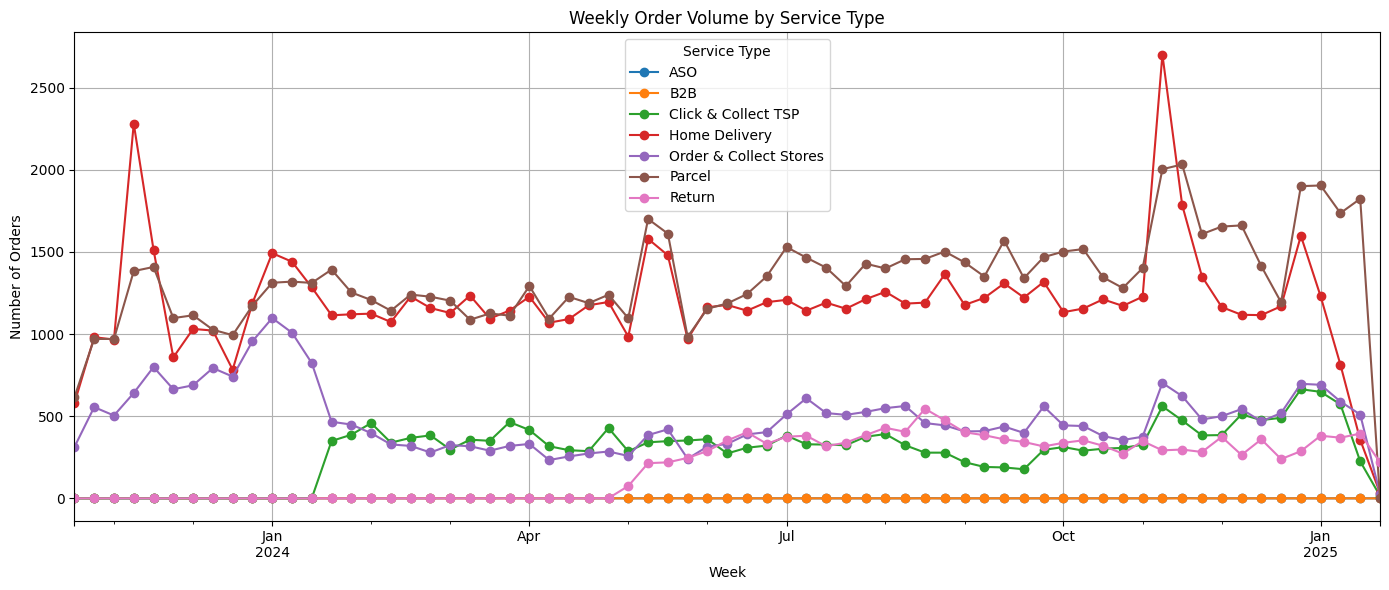

In [16]:
import matplotlib.pyplot as plt

weekly_pivot.plot(figsize=(14, 6), marker='o')
plt.title('Weekly Order Volume by Service Type')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.legend(title='Service Type')
plt.tight_layout()
plt.show()


In [17]:
orders_zip_codes = orders.copy()

In [18]:
# Group and count unique zip codes
unique_zip_counts = (
    orders_zip_codes.groupby(['Order_Week', 'Service Name 2'])['Ship-to Postcode']
    .nunique()
    .reset_index(name='Unique_Zip_Count')
)

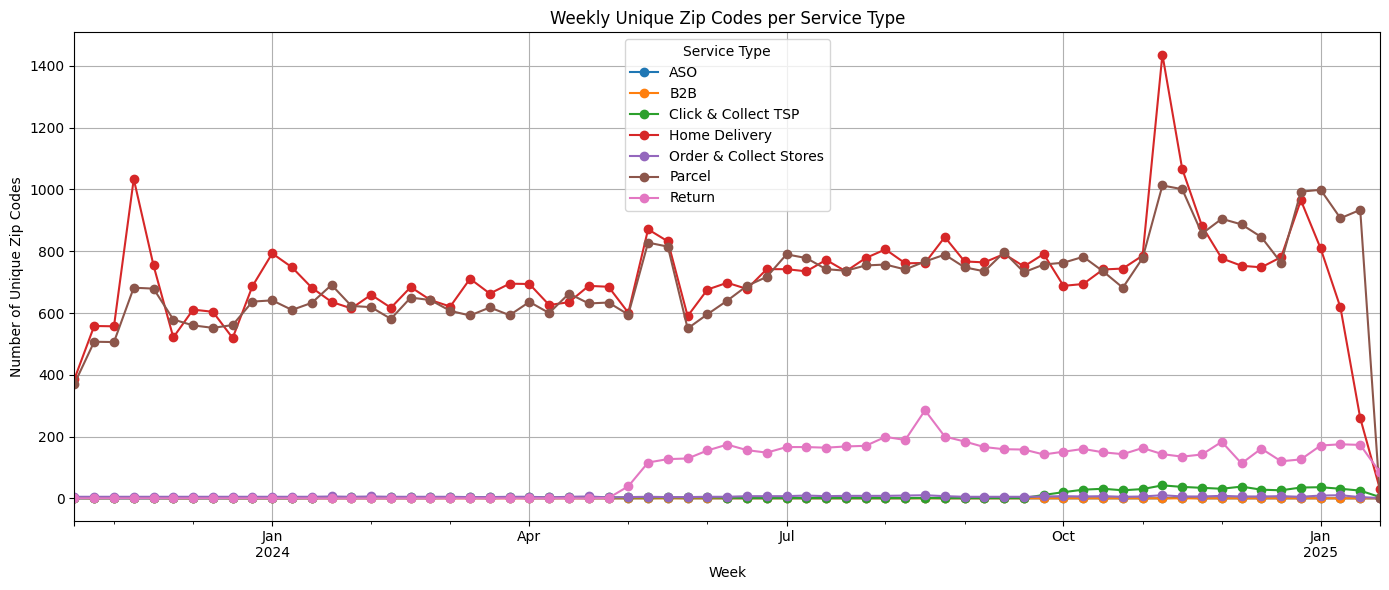

In [19]:
pivot_zip = unique_zip_counts.pivot(index='Order_Week', columns='Service Name 2', values='Unique_Zip_Count').fillna(0)

# Plot
pivot_zip.plot(figsize=(14,6), marker='o')
plt.title('Weekly Unique Zip Codes per Service Type')
plt.xlabel('Week')
plt.ylabel('Number of Unique Zip Codes')
plt.grid(True)
plt.legend(title='Service Type')
plt.tight_layout()
plt.show()


In [21]:
orders

,Store No.,Order Creation Date,Document No.,Service Name,Service Date,Capacity Value Weight,Capacity Value Volume,No. of Items,No of Packages,Total Order Value,Ship-to Postcode,Ship-to City,Sell-to City,Service Name 2,Channel,Oversold Order,Unit,Unit name,Order_Week
0,634,2023-10-25,S634230080611,Da Clic y Recoge E-Commerce,2023-10-28,34.600,0.095444,1.0,2.0,5249.0,06700,Cuauhtémoc,Mexico,Order & Collect Stores,E-commerce,Complete,634,E-commerce,2023-10-23
1,634,2023-10-25,S634230080612,Parcel Delivery,2023-10-28,1.834,0.007680,1.0,1.0,349.0,04450,Ciudad de Mexico,Ciudad de Mexico,Parcel,E-commerce,Complete,634,E-commerce,2023-10-23
2,634,2023-10-25,S634230080613,Parcel Delivery,2023-10-28,13.237,0.061946,4.0,4.0,1946.0,44100,Guadalajara,Guadalajara,Parcel,E-commerce,Complete,634,E-commerce,2023-10-23
3,634,2023-10-25,S634230080614,Parcel Delivery,2023-10-28,23.360,0.070175,3.0,3.0,2699.0,01760,CDMX,CDMX,Parcel,E-commerce,Complete,634,E-commerce,2023-10-23
4,634,2023-10-25,S634230080615,Parcel Delivery,2023-10-28,1.308,0.027368,5.0,5.0,507.0,50110,Toluca,Toluca,Parcel,E-commerce,Complete,634,E-commerce,2023-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233366,634,2025-01-31,R634230016017,Return Delivery,2025-01-31,64.680,0.178875,6.0,6.0,7200.0,14400,CDMX,CDMX,Return,Return Order,Complete,634,E-commerce,2025-01-27
233367,634,2025-01-31,R634230016020,Return Delivery,2025-01-31,3.570,0.007362,5.0,5.0,465.0,15530,Venustiano Carranza,Venustiano Carranza,Return,Return Order,Complete,634,E-commerce,2025-01-27
233368,634,2025-01-31,R634230016023,Return Delivery,2025-01-31,0.000,0.000000,100.0,100.0,100.0,06100,Ciudad de Mexico,Ciudad de Mexico,Return,Return Order,Complete,634,E-commerce,2025-01-27
233369,634,2025-01-31,R634230016031,Return Delivery,2025-01-31,0.000,0.000000,250.0,250.0,250.0,15530,Venustiano Carranza,Venustiano Carranza,Return,Return Order,Complete,634,E-commerce,2025-01-27


In [24]:
# Filter to chosen date range first
start_date = '2024-01-06'
end_date = '2024-01-12'
mask = (orders['Order Creation Date'] >= start_date) & (orders['Order Creation Date'] <= end_date)
subset = orders[mask]

# Count total orders per zip
zip_counts = subset['Ship-to Postcode'].value_counts().reset_index()
zip_counts.columns = ['Ship-to Postcode', 'Order_Count']


In [25]:
service_zip_coverage = (
    subset.groupby('Ship-to Postcode')['Service Name 2'].nunique()
    .reset_index(name='Num_Service_Types')
)


In [26]:
zip_summary = zip_counts.merge(service_zip_coverage, on='Ship-to Postcode')


In [27]:
# Filter to those with at least 2 service types
filtered_zips = zip_summary[zip_summary['Num_Service_Types'] >= 2]

# Then sort by total order volume
top_50_zips = filtered_zips.sort_values('Order_Count', ascending=False).head(50)
selected_zip_codes = top_50_zips['Ship-to Postcode'].tolist()


In [28]:
orders_subset = subset[subset['Ship-to Postcode'].isin(selected_zip_codes)]

In [31]:
len(orders_subset['Ship-to Postcode'].unique())

50